In [19]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [20]:
# Set file path and read file
file = Path("Resources/DataForTable2.1.csv")
raw_df = pd.read_csv(file)

In [21]:
# Clean the dataset by dropping rows with no value in the 'Life Ladder' or 'Log GDP per capita' columns

cleaned_df = raw_df.dropna(subset=['Life Ladder', 'Log GDP per capita'])

# Print how many rows were dopped
rows_dropped = len(raw_df) - len(cleaned_df)
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 28


In [50]:
# Take the average of all metrics for each year.  Group by country name
average_df = raw_df.groupby('Country name').mean().reset_index()

# This allows the data frame to fully display (so it's not truncated)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
average_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2015.200000,3.219933,7.585692,0.476733,52.711667,0.480533,0.056154,0.835800,0.421800,0.370733
1,Albania,2015.437500,5.072750,9.416937,0.714250,68.548750,0.694937,-0.068187,0.868688,0.559750,0.294563
2,Algeria,2016.363636,5.392000,9.338182,0.811700,66.136364,0.520778,-0.132556,0.688111,0.540400,0.266400
3,Angola,2012.500000,4.420250,8.985750,0.738250,52.150000,0.456250,-0.093250,0.866750,0.625750,0.351250
4,Argentina,2014.500000,6.289667,10.028833,0.901833,66.700000,0.777722,-0.153222,0.839056,0.737944,0.288333
5,Armenia,2014.176471,4.679529,9.339706,0.732471,65.866176,0.605647,-0.198412,0.820118,0.502471,0.442765
6,Australia,2014.764706,7.242412,10.764824,0.942412,70.570588,0.914471,0.254063,0.429294,0.737647,0.218471
7,Austria,2015.312500,7.179000,10.889313,0.918563,70.487500,0.894062,0.132875,0.560438,0.715750,0.190062
8,Azerbaijan,2013.750000,4.935250,9.527750,0.760375,62.507812,0.681125,-0.158250,0.693750,0.518250,0.240687
9,Bahrain,2014.916667,5.998167,10.784333,0.874455,65.655000,0.862273,0.064778,0.553400,0.670818,0.352000


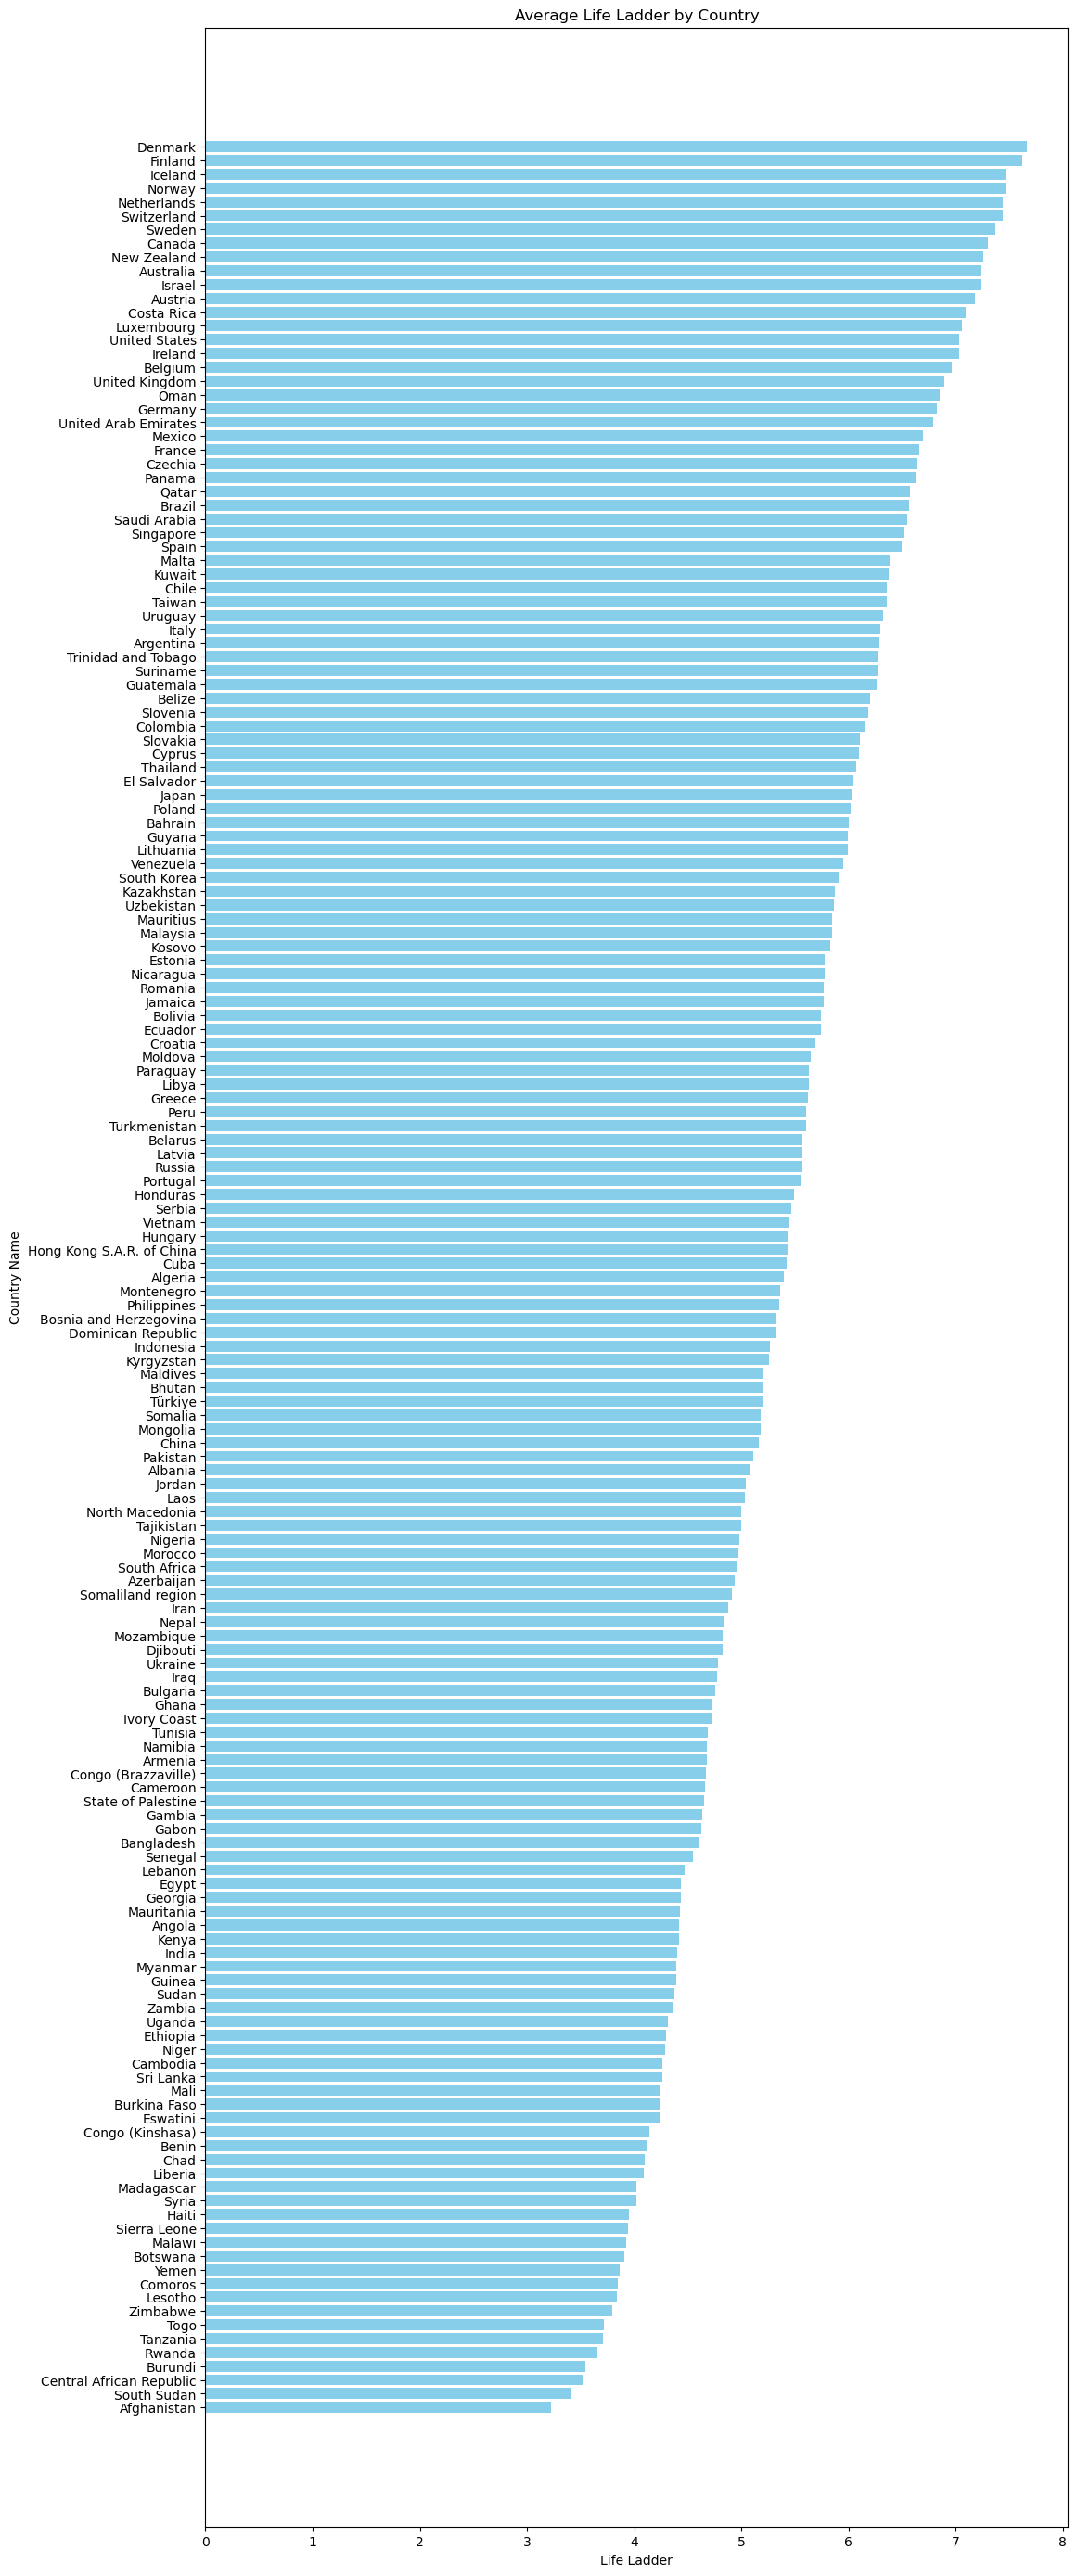

In [57]:
# Create a bar chart showing life ladder score for every country. 

# Sort the DataFrame by 'Life Ladder' so the chart shows highest to lowest
average_df_sorted = average_df.sort_values(by='Life Ladder', ascending=True)

# Create the bar plot
plt.figure(figsize=(12, 35))  # Adjust the figure size as needed
plt.barh(average_df_sorted['Country name'], average_df_sorted['Life Ladder'], color='skyblue')

# Add labels and title
plt.xlabel('Life Ladder')
plt.ylabel('Country Name')
plt.title('Average Life Ladder by Country')

# Show the plot
plt.show()

In [53]:
# Find latitude and longitude for each country using the geo API
import requests
import json

# Import the API key
from config import geoapify_key

#Change the country name "Taiwan Provence of China" to just "Taiwan" to allow geoapi to find a result.
average_df.loc[average_df['Country name'] == 'Taiwan Province of China', 'Country name'] = 'Taiwan'

# Initialize lists to store latitudes and longitudes
latitudes = []
longitudes = []

# Iterate over each country in the DataFrame
for country in average_df['Country name']:
    # Build the endpoint URL
    target_url = f"https://api.geoapify.com/v1/geocode/search?country={country}&format=json&apiKey={geoapify_key}"
    
    # Run a request to the endpoint and convert the result to json
    geo_data = requests.get(target_url).json()
    
    # Extract latitude and longitude
    # lat = geo_data["results"][0]["lat"]
    # lon = geo_data["results"][0]["lon"]
    
    if geo_data["results"]:
        lat = geo_data["results"][0]["lat"]
        lon = geo_data["results"][0]["lon"]
    else:
        # Handle the case where no results are returned
        lat = None
        lon = None
        print(f"No geolocation data found for {country}")


    # Append to lists
    latitudes.append(lat)
    longitudes.append(lon)

# Add the latitudes and longitudes to the DataFrame
average_df['Latitude'] = latitudes
average_df['Longitude'] = longitudes

# Display the updated DataFrame
average_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Latitude,Longitude
0,Afghanistan,2015.200000,3.219933,7.585692,0.476733,52.711667,0.480533,0.056154,0.835800,0.421800,0.370733,33.768006,66.238514
1,Albania,2015.437500,5.072750,9.416937,0.714250,68.548750,0.694937,-0.068187,0.868688,0.559750,0.294563,41.000028,19.999962
2,Algeria,2016.363636,5.392000,9.338182,0.811700,66.136364,0.520778,-0.132556,0.688111,0.540400,0.266400,28.000027,2.999983
3,Angola,2012.500000,4.420250,8.985750,0.738250,52.150000,0.456250,-0.093250,0.866750,0.625750,0.351250,-11.877577,17.569124
4,Argentina,2014.500000,6.289667,10.028833,0.901833,66.700000,0.777722,-0.153222,0.839056,0.737944,0.288333,-34.996496,-64.967282


In [54]:
import hvplot.pandas

In [55]:
# Create a map showing life ladder score for every country.

# Configure the map
life_ladder_map = average_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "Life Ladder",
    scale = 5,
    color = "Country name",
    xlim=(-180, 180),  # Adjust x-axis range for longitude
    ylim=(-80, 80)     # Adjust y-axis range for latitude
)

# Display the map plot
life_ladder_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country name,Life Ladder)